## Our best model was an XGBClassifier with tuned hyperparameters

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("../data/preprocessed_data.csv")
test_data = pd.read_csv("../data/preprocessed_test_data.csv")

X_train = train_data.drop(["Depression"], axis=1)
y_train = train_data.Depression

In [3]:
# Preparation for plotting

df = pd.read_csv("../data/train.csv")

features = df.drop(["Depression"], axis=1)
age = features.Age
cgpa = features.CGPA
features = features.drop(["Age", "CGPA"], axis=1)

def combine_rare_values(df, feature):
    value_counts = df[feature].value_counts()
    rare_values = value_counts[value_counts < 100].index
    df[feature] = df[feature].replace(rare_values, 'other')
    
for feature in features:
    combine_rare_values(features, feature)


df['Depression'] = df['Depression'].map({1: 'Yes', 0: 'No'})

KeyboardInterrupt: 

In [1]:
# Plot categorical features
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Depression')
    plt.title(f'{feature} vs Depression')
    plt.ylabel("Count")
    plt.show()

NameError: name 'features' is not defined

In [4]:
# XGBClassifier with best parameters (found earlier with grid search cross validation)

params = {'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'num_class': 3,
 'objective': 'multi:softmax',
 'subsample': 0.8}

xgbc = xgb.XGBClassifier(**params)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

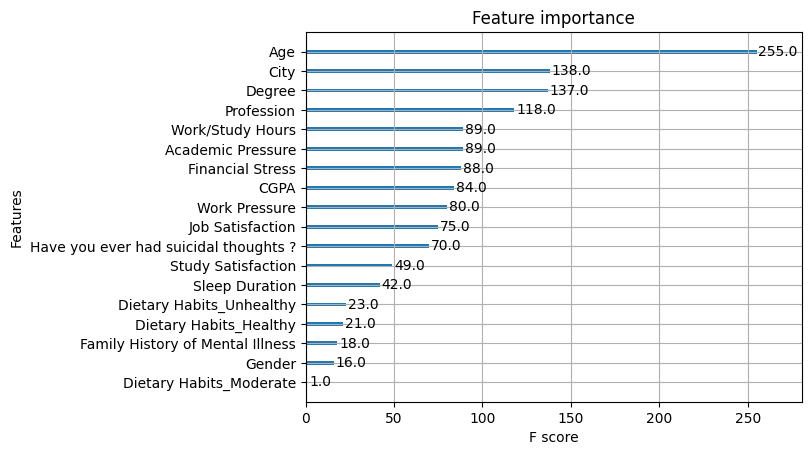

In [5]:
xgb.plot_importance(xgbc)
import matplotlib.pyplot as plt
plt.show()